# TP 1: Descriptive statistics, statistical models, data visualization

## Jeu de données

Chargement des modules nécessaires pour faire les différents traitements.

Doc des modules :
- [matplotlib](https://matplotlib.org), la librairie graphique de python la plus utilisée. [doc](https://matplotlib.org/stable/index.html) et des [cheatsheets utiles](https://matplotlib.org/cheatsheets/)
- [seaborn](https://seaborn.pydata.org/), librairie graphique, surcouche de matplotlib adaptée pour les DataFrame de pandas, et très utilisée en data science. [doc](https://seaborn.pydata.org/api.html), [galerie d'exemples](https://seaborn.pydata.org/examples/index.html)
- [pandas](https://pandas.pydata.org/docs/index.html), [doc](https://pandas.pydata.org/docs/reference/index.html#api) et en particulier [DataFrame](https://pandas.pydata.org/docs/reference/frame.html)
- `scipy.stats`:
    - [Lois continues](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
    - [Lois discrètes](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions)
- [numpy](https://numpy.org/doc/stable/index.html), [doc](https://numpy.org/doc/stable/reference/index.html#reference)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import numpy
import seaborn as sns

sns.set()  # set default graphical style

Jeu de données [tips](https://fxjollois.github.io/cours-2016-2017/donnees/tips.csv)
[[informations]](https://www.rdocumentation.org/packages/reshape2/versions/1.4.2/topics/tips) d'après le tp de [FX Jollois](https://fxjollois.github.io)

Chargez le fichier de données avec la fonction [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de pandas.

In [2]:
tips = pd.read_csv('data/tips.csv')

Visualisation du jeu de données

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Statistiques descriptives univariées

### Analyse et visualisation d'une variable continue

Affichez le type de chaque variable grâce à l'attribut `dtypes` du DataFrame

In [4]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

La méthode [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) d'un DataFrame ou d'une Series nous permet d'obtenir une liste de statistiques sur chacune des colonnes de type "numérique". 

Afficher ces statistiques pour toutes les variables numériques du DataFrame, puis seulement pour la variable `tip`.

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

On peut aussi calculer ces statistiques pour chacune des variables avec les méthodes `mean`, `std`, `var`, `min`, `max`, `median`, `quantile`, ...

Affichez à l'écran la moyenne, la médiane et le quantile 25% de la variable `total_bill`.

In [7]:
print("Moyenne")
print(tips.total_bill.mean())
print("Médiane")
print(tips.total_bill.median())
print("Quantile 25%")
print(tips.total_bill.quantile(0.25))

Moyenne
19.78594262295082
Médiane
17.795
Quantile 25%
13.3475


On peut demander plusieurs quantiles à la fois en passant une liste de flottant à la fonction [quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html). Le résultat est alors une [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) (structure de données 1D de pandas). 

Affichez les quantiles 1%, 25%, 75% et 99% de la variable `total_bill`.

In [8]:
tips.total_bill.quantile([0.01,0.25,0.75,0.99])

0.01     7.2500
0.25    13.3475
0.75    24.1275
0.99    48.2270
Name: total_bill, dtype: float64

Calculez l'écart-type de la variable `total_bill` avec 1) la fonction [std](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) de pandas et 2) la fonction [std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) de numpy

In [9]:
print(tips.total_bill.std())
print(np.std(tips.total_bill))

8.902411954856856
8.88415057777113


Le résultat est-il le même ? Pourquoi ? Trouvez le paramètre permettant d'obtenir les mêmes résultats.

In [10]:
# Le résultat est différent car la normalisation de base n'est pas la même, on peut la modifier avec le paramètre ddof. 
print(tips.total_bill.std(ddof=0))
print(np.std(tips.total_bill))

8.88415057777113
8.88415057777113


#### Histogrammes

##### Graphiques "à la main" en utilisant matplotlib

Matplotlib prend en entrée des types de données 1D "simples" comme des listes, tableaux numpy, ou Series pandas.

Initialisez une [figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure) matplotlib de largeur 7 et de hauteur 5 (en pouces), affichez l'histogramme de la variable `total_bill` grâce à la fonction [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) puis affichez des noms d'axes et de figure judicieux grâce aux fonctions [xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel) et [title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib-pyplot-title).

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

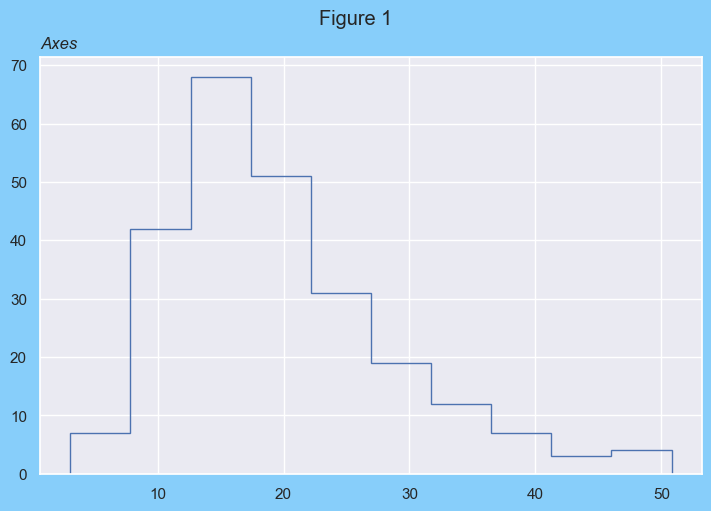

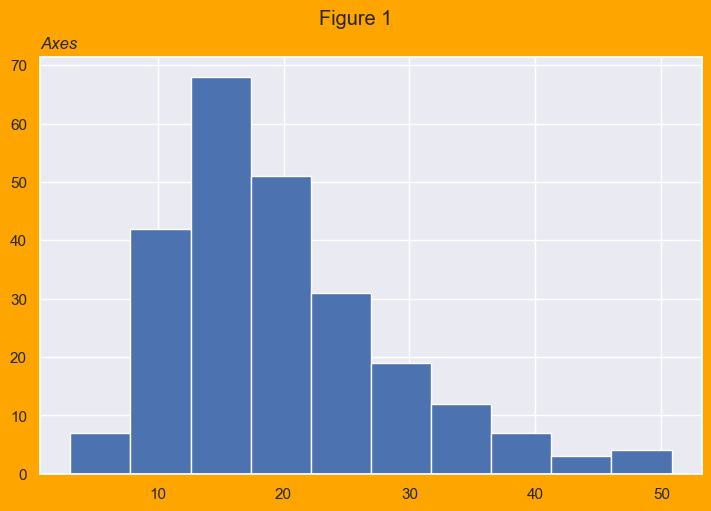

In [11]:
fig1, ax1 = plt.subplots(figsize=(7, 5), facecolor='lightskyblue',
                       layout='constrained')
fig1.suptitle('Figure 1')
ax1.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
counts, bins = np.histogram(tips.total_bill)
plt.stairs(counts, bins)


fig2, ax2 = plt.subplots(figsize=(7, 5), facecolor='orange',
                       layout='constrained')
fig2.suptitle('Figure 1')
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
plt.hist(bins[:-1], bins, weights=counts)

(array([140.,  88.,  16.]),
 array([ 3.07      , 18.98333333, 34.89666667, 50.81      ]),
 <BarContainer object of 3 artists>)

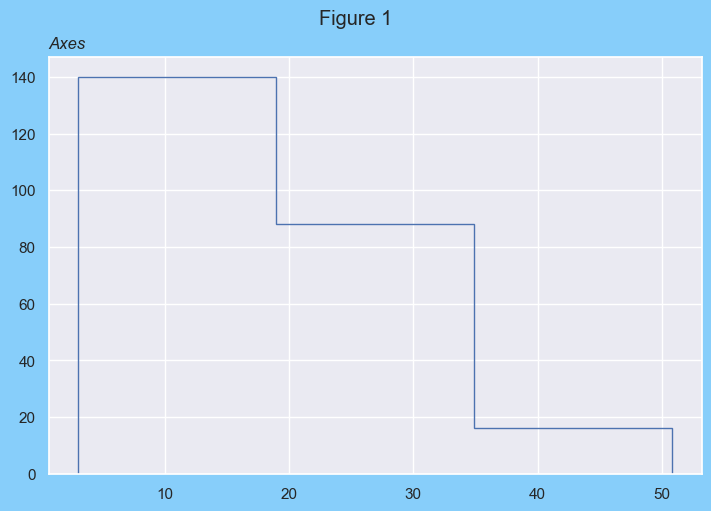

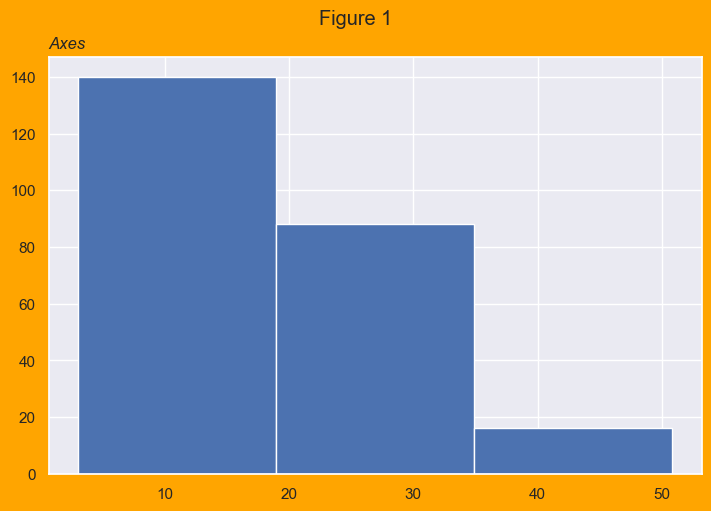

In [12]:
fig1, ax1 = plt.subplots(figsize=(7, 5), facecolor='lightskyblue',
                       layout='constrained')
fig1.suptitle('Figure 1')
ax1.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
counts, bins = np.histogram(tips.total_bill, bins = 3)
plt.stairs(counts, bins)


fig2, ax2 = plt.subplots(figsize=(7, 5), facecolor='orange',
                       layout='constrained')
fig2.suptitle('Figure 1')
ax2.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
plt.hist(bins[:-1], bins, weights=counts)

##### Graphiques directement à partir du DataFrame (fait appel aux fonctions de matplotlib)

Pandas fournit aussi des méthodes de plot directement sur les DataFrame et les Series. Afficher un graphique de type "hist" à partir du DataFrame grâce à la méthode [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) (regardez la doc du paramètre `kind`):

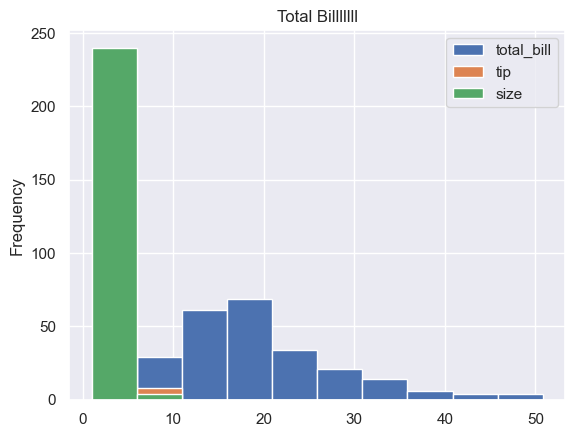

In [13]:
plot = tips.plot(kind='hist', title="Total Billlllll")

Ce graphique est peu lisible et présente des problème d'échelle entre les variables. Afficher ces histogrammes dans des figures séparées avec la méthode [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) sur un DataFrame.

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

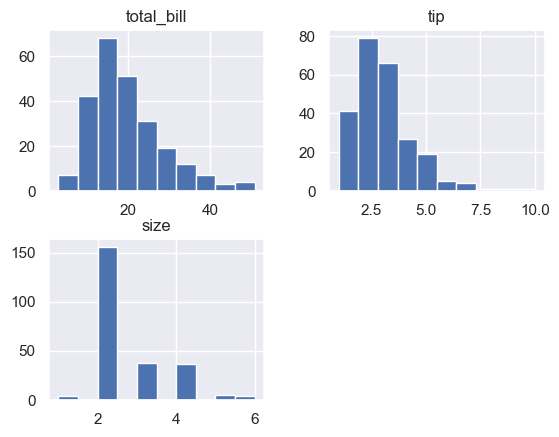

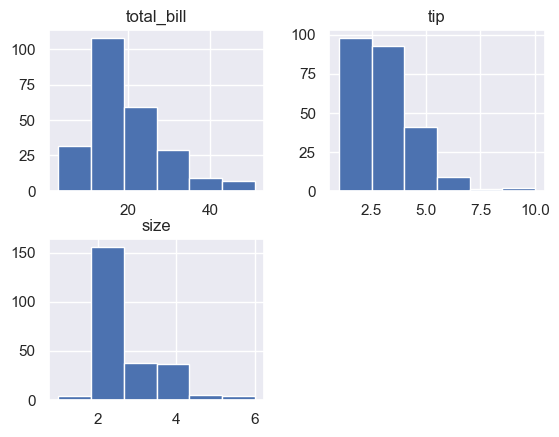

In [14]:
tips.hist()
tips.hist(bins=6)

Utilisez la même méthode mais cette fois seulement sur la colonne `total_bill`:

<Axes: >

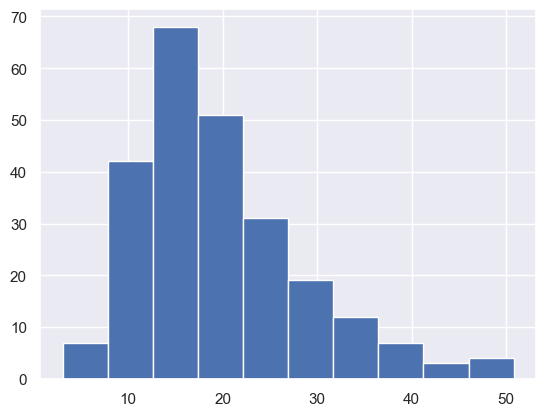

In [15]:
tips.total_bill.hist()

Plusieurs paramètres sont disponibles, voir la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.hist.html). Changez par exemple le nombre de `bins` et étudiez l'impact sur le graphique.

Bonus: trouvez le paramètre qui fait en sorte que l'aire représentée par les rectangles soit égale à 1.

<Axes: >

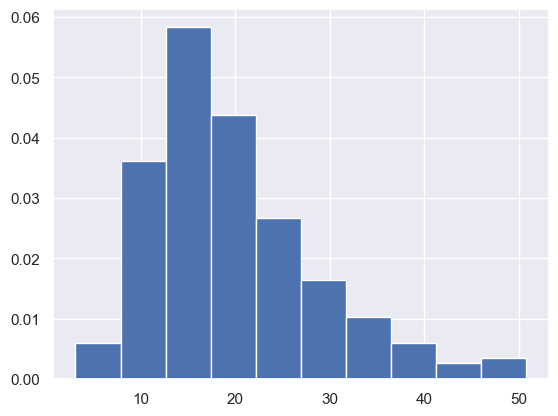

In [16]:
tips.total_bill.hist(density=True)

##### Avec seaborn

Seaborn est une surcouche de matplotlib. Cette librairie est adaptée aux DataFrame de pandas et les résultats sont souvent plus "jolis" qu'avec matplotlib seul. Chaque fonction de plot de seaborn prend en premier paramètre un DataFrame, puis les paramètres `x` et `y` servent à indiquer le **nom** des variables à utiliser (plus besoin de manipuler des Series ou des tableaux numpy, seaborn s'en charge!).

Une galerie d'exemples est disponible [ici](https://seaborn.pydata.org/examples/index.html).

Affichez un histogramme de la variable `tip` en utilisant la fonction [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) de seaborn.

<Axes: xlabel='tip', ylabel='Count'>

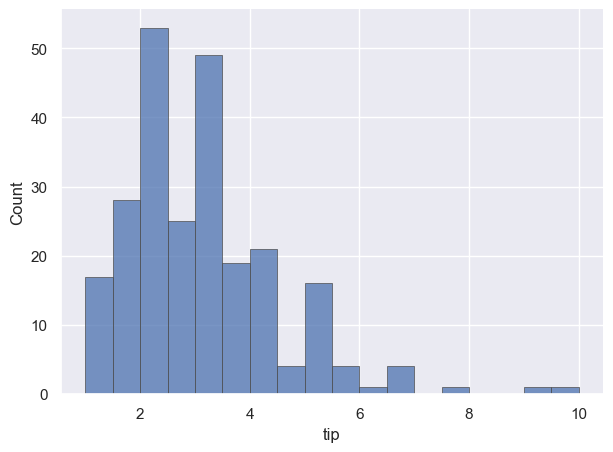

In [17]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    tips, x="tip",
    edgecolor=".3",
    linewidth=.5,
)

On voit que seaborn se charge aussi de donner des noms aux axes.

Même chose mais en utilisant 50 `bins`. Comment est déterminé le nombre de `bins` quand il n'est pas spécifié par l'utilisateur ?

<Axes: xlabel='tip', ylabel='Count'>

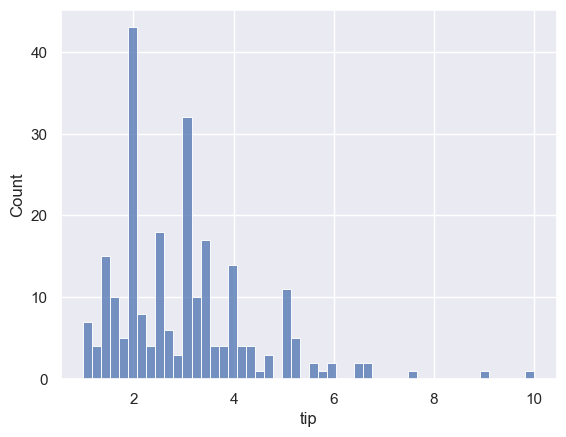

In [18]:
sns.histplot(
    tips, x="tip",
    bins=50
)
# The default bin size is determined using a reference rule that depends on the sample size and variance. 

On peut aussi ajouter une estimation de la densité avec un [estimateur par noyau](https://fr.wikipedia.org/wiki/Estimation_par_noyau) (estimation non paramétrique) grâce au paramètre `kde`. Affichez la densité par dessus l'histogramme. Utilisez aussi le paramètre `stat` pour que la somme des aires des rectangles soit égale à 1.

<Axes: xlabel='tip', ylabel='Density'>

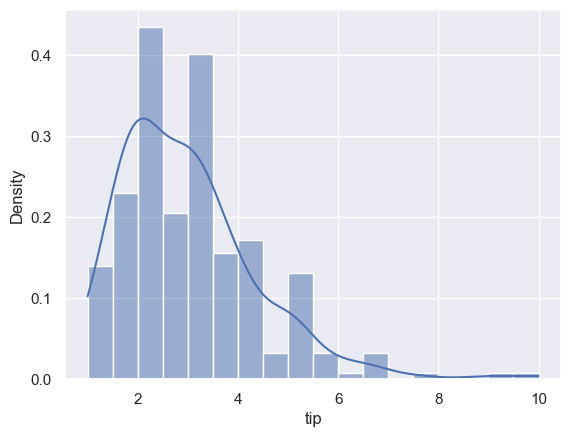

In [19]:
sns.histplot(
    tips, x="tip",
    kde=True,
    stat="density"
)

#### Boîtes à moustaches

Vous pouvez tracer des boites à moustache en utilisant : 
- la fonction [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) de matplotlib, 
- la méthode [boxplot(colonne)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) sur un DataFrame pandas 
- [.plot.box()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html) sur une Series pandas
- la fonction [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) de seaborn.

Affichez sur un même graphique les boxplots des variables `total_bill` et `tip` avec la méthode de votre choix.

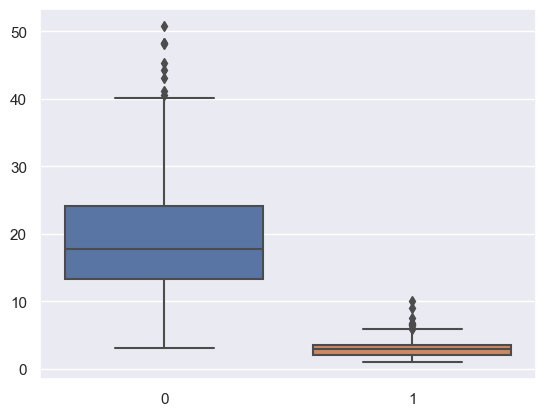

In [20]:
fig = sns.boxplot([tips.total_bill,tips.tip])
#fig.set_axis_labels('Colors', 'Values')

#### Diagramme en violon

La même chose mais avec une estimation de la densité. Plus graphique mais attention aux cas limites, l'estimation de densité n'est pas toujours appropriée (taille de l'échantillon trop petit, l'estimation peut "dépasser" du min/max des données).

- Fonction [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) de seaborn
- Fonction [violinplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) de matplotlib
- Pas de méthode sur les DataFrame

Afficher un diagramme en violon de la variable `total_bill` et `tip`. Comparez avec les boxplot la manière dont sont affichés la médiane, les quartiles, ainsi que les "moustaches".

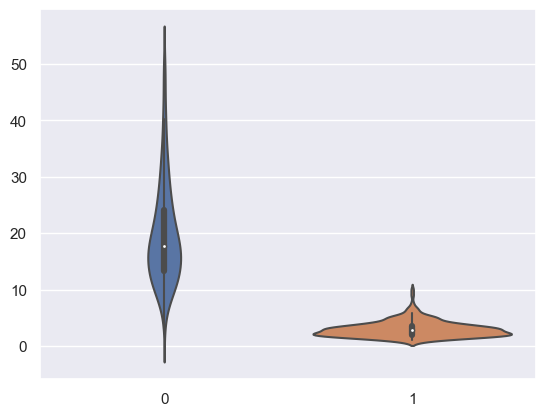

In [21]:
fig = sns.violinplot([tips.total_bill,tips.tip])

### Analyse et visualisation d'une variable catégorielle

#### Statistiques descriptives

La méthode `describe` peut afficher des statistiques pour les variables catégorielles, mais pour le moment nos variables sont considérées comme "object" (type générique utilisé par pandas quand il ne peut pas inférer le type d'une variable). Commençons par changer le type de nos variables catégorielles `sex`, `smoker`, `day` et `time`. Pour cela, utilisez la méthode `astype('category')` (voir [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [22]:
tips.sex = tips.sex.astype('category')
tips.smoker = tips.smoker.astype('category')
tips.day = tips.day.astype('category')
tips.time = tips.time.astype('category')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

On peut maintenant obtenir des statistiques sur les variables catégorielles :

In [23]:
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


Pour chaque variable catégorielle, affichez les valeurs qu'elle peut prendre avec la fonction [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html). Affichez ensuite le nombre d'observations pour chacune de ces catégories grâce à [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). Triez les résultats par ordre **décroissant** avec [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

In [24]:
pd.unique(tips.sex)

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [25]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [26]:
tips.sort_values(by=['day'])

,total_bill,tip,sex,smoker,day,time,size
96,27.28,4.00,Male,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
...,...,...,...,...,...,...,...
132,11.17,1.50,Female,No,Thur,Lunch,2
131,20.27,2.83,Female,No,Thur,Lunch,2
130,19.08,1.50,Male,No,Thur,Lunch,2
128,11.38,2.00,Female,No,Thur,Lunch,2


In [27]:
tips.day.value_counts().sort_values(ascending=False) 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

#### Bar plot

On commence par calculer le tableau des fréquences de la variable `day` avec la fonction [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html). Faites en sorte que la somme des fréquences soit égale à 1 et stockez le résultat dans une variable.

In [28]:
day_freq = pd.crosstab(tips.day, columns='day', normalize=True)

Affichez un bar plot de `day` (à ne pas confondre avec un histogramme!), en utilisant la méthode `.plot.bar` sur le tableau de fréquence.

Bonus: affichez les jours dans l'ordre.

<Axes: xlabel='day'>

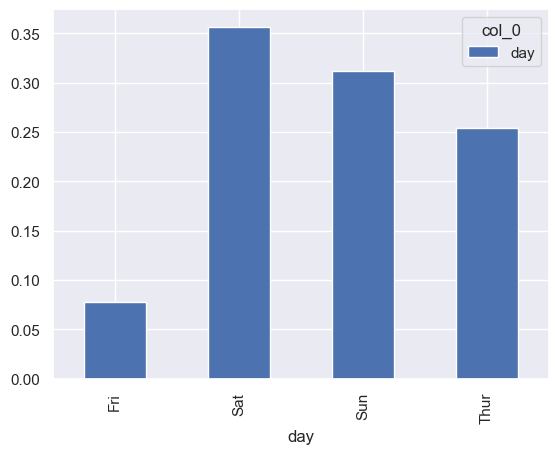

In [29]:
day_freq.plot.bar()

Alternative : calculez la fréquence par catégorie avec `value_counts` puis tracez un diagramme en barres sur le dataframe résultat.

In [30]:
day_freq2 = tips.day.value_counts()

<Axes: >

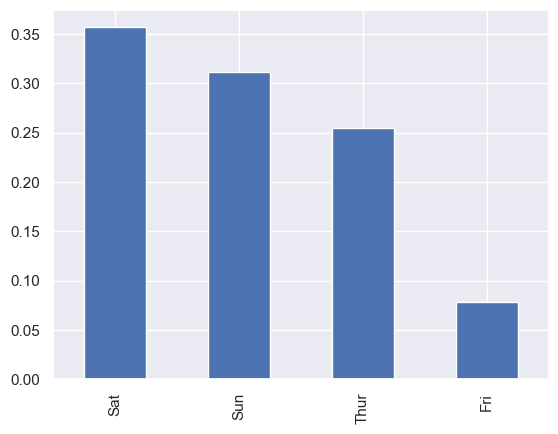

In [31]:
(day_freq2/len(tips)).plot.bar()

## Statistiques descriptives bivariées

### Deux variables numériques (quantitative - quantitative)

#### Matrice de corrélation

Avec la méthode [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), affichez la matrice de corrélation des données **numériques** du jeu de données `tips`. Même chose avec la matrice de covariance.

In [32]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [33]:
tips.cov(numeric_only=True)

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


On peut aussi calculer la corrélation (ou la covariance) entre deux variables avec la même méthode, mais sur une Series ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html)). Calculez la corrélation entre la variable `total_bill` et `tip`.

In [34]:
tips.total_bill.corr(tips.tip)

0.6757341092113641

Affichez maintenant une heatmap de cette matrice de corrélation avec la fonction [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de seaborn. Choisissez une colormap en vous aidant de [ce lien](https://matplotlib.org/stable/tutorials/colors/colormaps.html), et faites en sorte que l'échelle des valeurs aille de 0 à 1.

<Axes: >

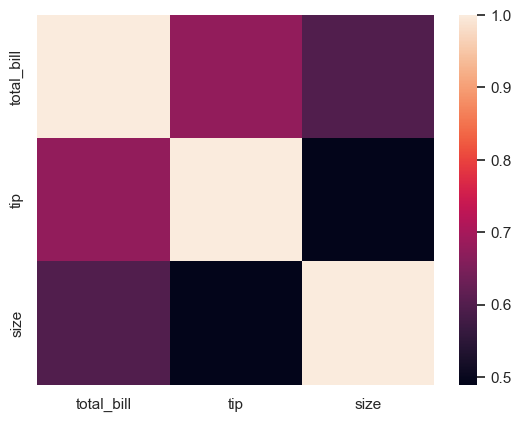

In [35]:
mat_corr = tips.corr(numeric_only=True)
sns.heatmap(mat_corr)

#### Nuage de points

Visualisations croisées des données numériques.

En utilisant la fonction [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) de matplotlib, affichez une nuage de points avec `tip` en ordonnée et `total_bill` en abscisse. Ajoutez des noms aux axes et à la figure.

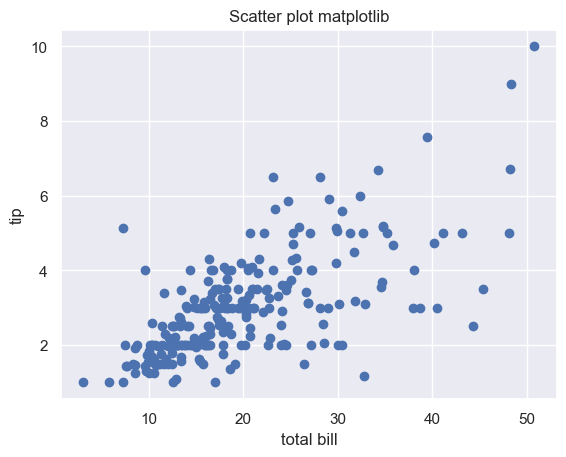

In [36]:
plt.scatter(x=tips.total_bill, y=tips.tip)
plt.ylabel('tip')
plt.xlabel('total bill')
plt.title('Scatter plot matplotlib')
plt.show()

Faites la même chose avec la fonction [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) de seaborn.

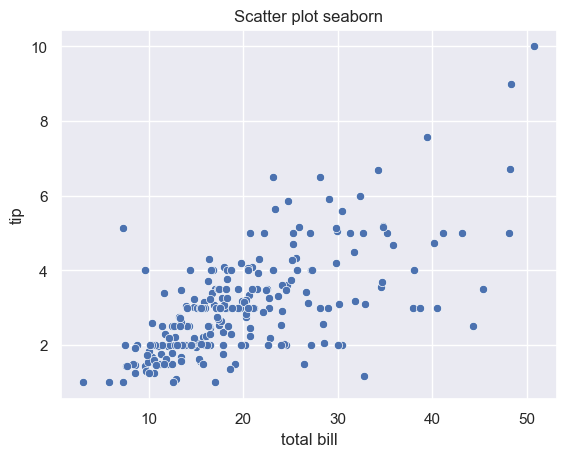

In [37]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.ylabel('tip')
plt.xlabel('total bill')
plt.title('Scatter plot seaborn')
plt.show()

seaborn fournit aussi une fonction [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) pour combiner les représentations uni et bi-dimensionnelles. Essayez la.

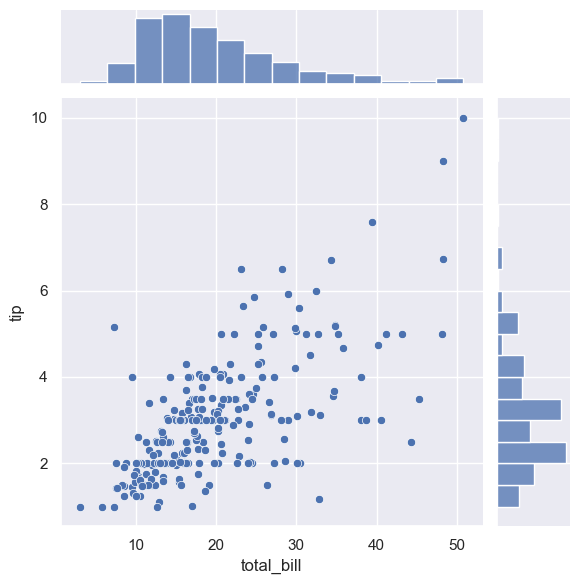

In [38]:
sns.jointplot(data=tips, x="total_bill", y="tip")

Enfin, pandas a une fonction [scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) dans le module `plotting` qui permet d'afficher toutes les paires de nuages de points avec les variables numériques du jeu de données. N'oubliez pas de changer la taille de la figure.

array([[<Axes: xlabel='total_bill', ylabel='total_bill'>,
        <Axes: xlabel='tip', ylabel='total_bill'>,
        <Axes: xlabel='size', ylabel='total_bill'>],
       [<Axes: xlabel='total_bill', ylabel='tip'>,
        <Axes: xlabel='tip', ylabel='tip'>,
        <Axes: xlabel='size', ylabel='tip'>],
       [<Axes: xlabel='total_bill', ylabel='size'>,
        <Axes: xlabel='tip', ylabel='size'>,
        <Axes: xlabel='size', ylabel='size'>]], dtype=object)

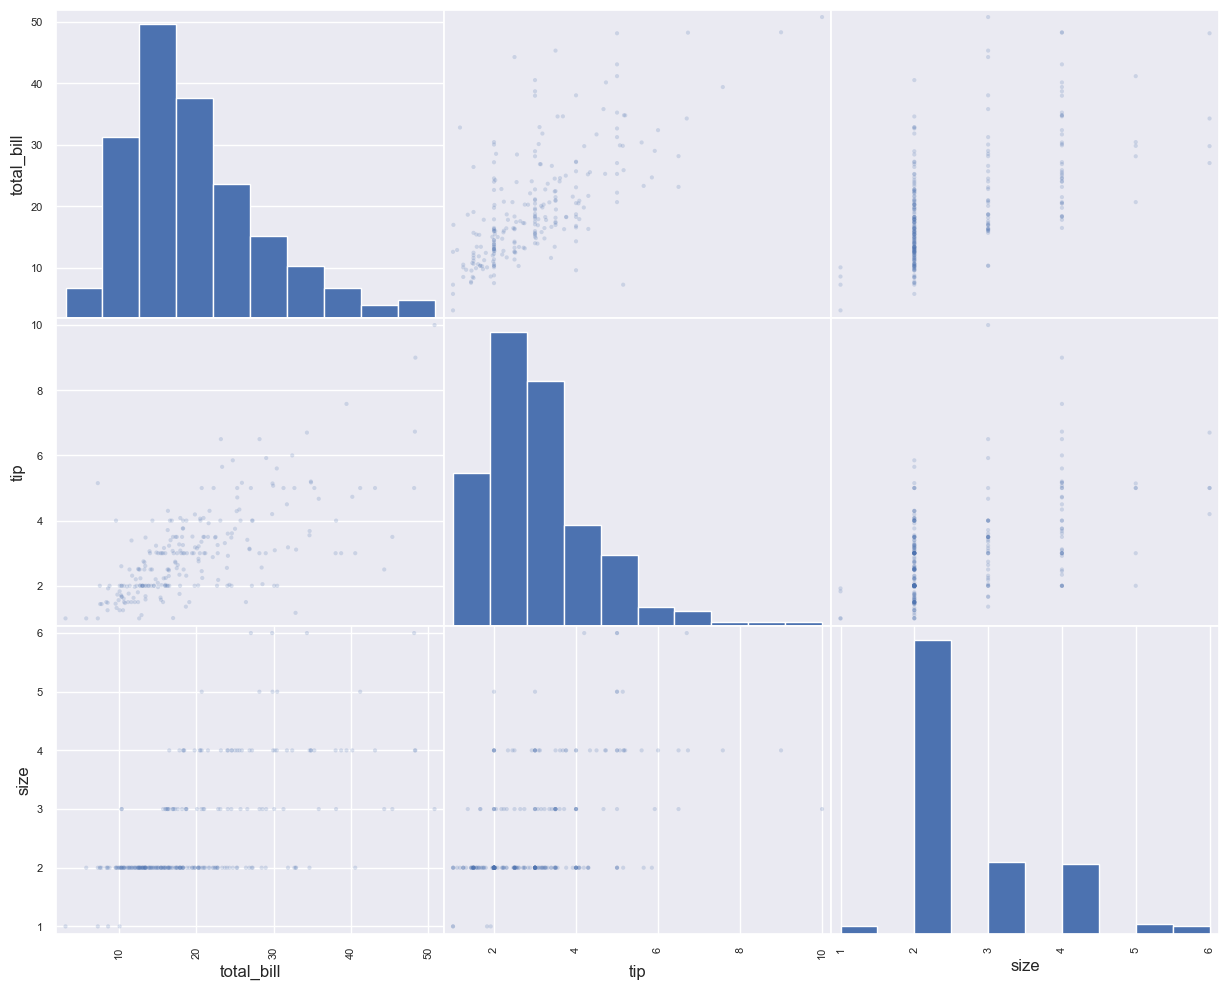

In [39]:

pd.plotting.scatter_matrix(tips, alpha=0.2, figsize=(15,12))


### Une variable numérique et une variable catégorielle (quantitative - qualitative)

Groupez les colonnes suivant la colonne `day` puis affichez un descriptif des colonnes `tip` et `total_bill` avec la fonction `describe`.

In [40]:
tips.groupby('day').tip.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70


In [41]:
tips.groupby('day').total_bill.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11


Quel jour rapporte le plus en terme de pourboire moyen ? Quel a été le jour avec le plus gros pourboire ?

Affichez le pourboire moyen pour les hommes et les femmes :

In [42]:
tips.groupby('sex').tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

#### Diagramme en violon

Affichez un diagramme en violon avec le jour en abscisse et le pourboire en ordonnée. Est-ce que la distribution de la valeur des pourboires est la même pour chaque jour ? Qu'en est-il du pourboire médian ? Calculez puis affichez à l'écran la valeur du pourboire médian par jour (pas sur le graphique).

Bonus : Affichez les jours dans l'ordre sur le graphique

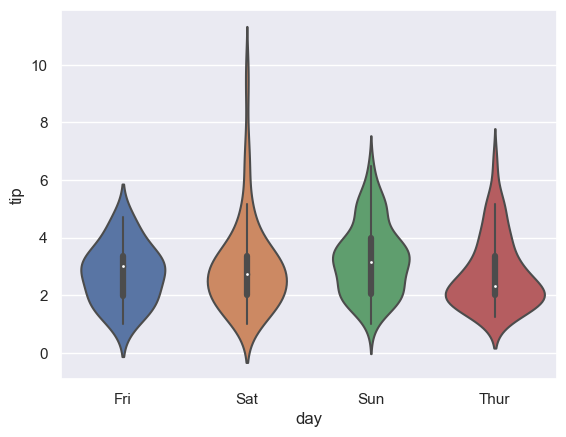

In [43]:
fig = sns.violinplot(tips, x='day', y='tip')

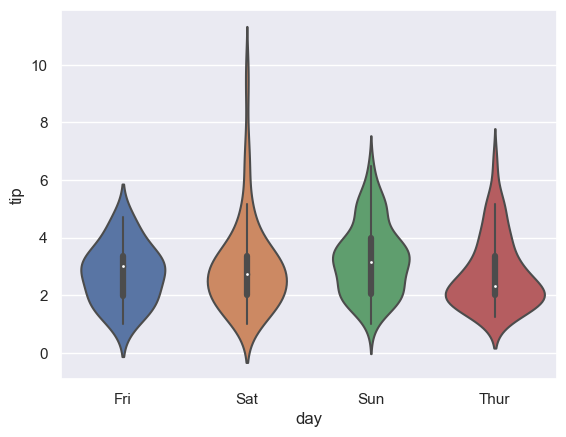

In [44]:
fig = sns.violinplot(tips, x='day', y='tip')

Affichez un diagramme en violon de `total_bill` en fonction de la variable `sex`.

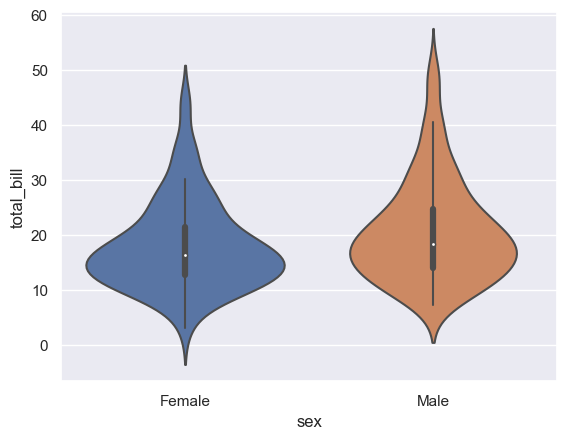

In [45]:
fig = sns.violinplot(tips, x='sex', y='total_bill')

D'après ce graphique, quelles semblent être les valeurs minimales et maximales de l'addition pour les hommes et les femmes ? Calculez les vraies valeurs et comparez à votre lecture graphique.

In [46]:
tips.groupby('sex').total_bill.max()

sex
Female    44.30
Male      50.81
Name: total_bill, dtype: float64

In [47]:
tips.groupby('sex').total_bill.min()

sex
Female    3.07
Male      7.25
Name: total_bill, dtype: float64

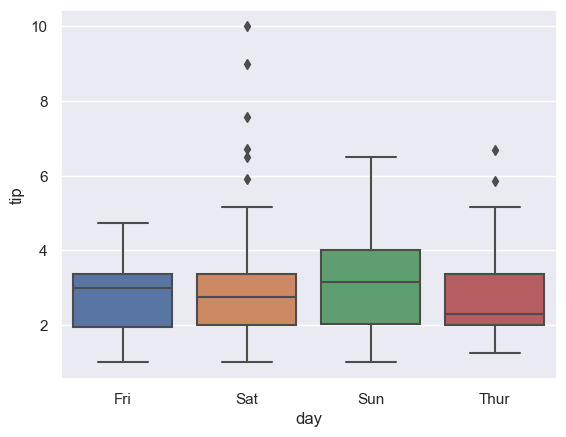

In [48]:
fig = sns.boxplot(tips, x='day', y='tip')

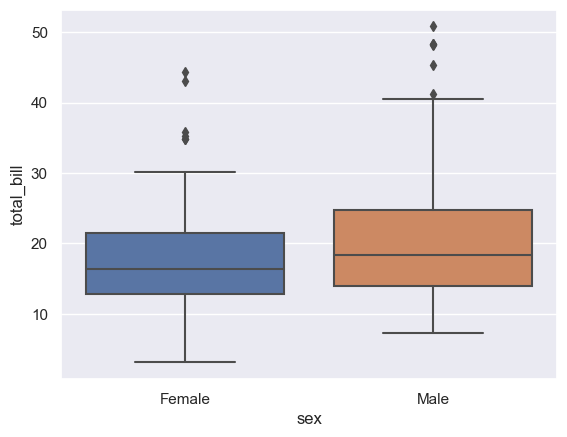

In [49]:
fig = sns.boxplot(tips, x='sex', y='total_bill')

#### Boîte à moustache

Affichez le même graphique que précédemment mais cette fois-ci avec des boîtes à moustache.

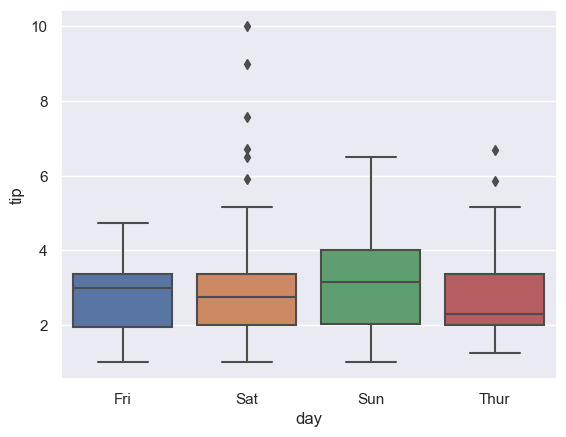

In [50]:
fig = sns.boxplot(tips, x='day', y='tip')


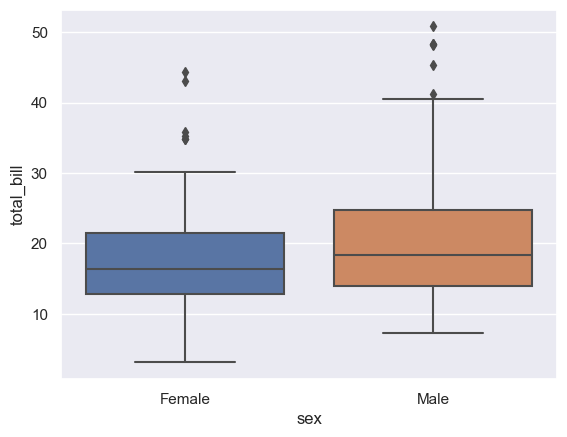

In [51]:
fig2 = sns.boxplot(tips, x='sex', y='total_bill')

Les valeurs extremales vous semblent-elles être mieux représentées sur ce graphique ?

Affichez maintenant la distribution de la valeur de l'addition en fonction de la taille du groupe de convive, avec des boîtes à moustache.

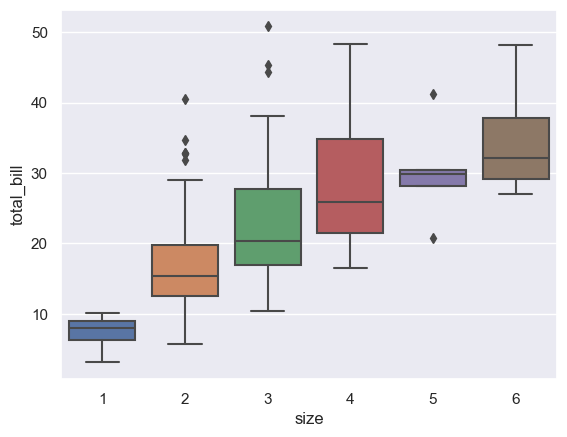

In [52]:
fig2 = sns.boxplot(tips, x='size', y='total_bill')

La même chose avec le pourboire :

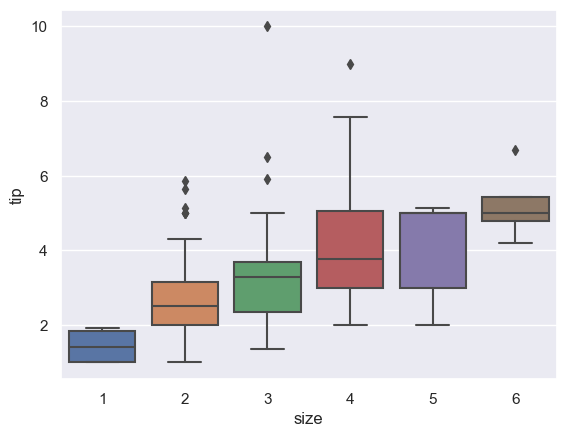

In [53]:
fig2 = sns.boxplot(tips, x='size', y='tip')

Etudions maintenant le pourboire comme pourcentage de l'addition totale. Ajoutez une colonne `tip_%` à votre DataFrame qui contient cette valeur (de 0 à 100).

In [54]:
tips['tip%'] = tips.tip*100/tips.total_bill

Affichez maintenant les boîtes à moustache de `tip_%` en fonction de `size`.

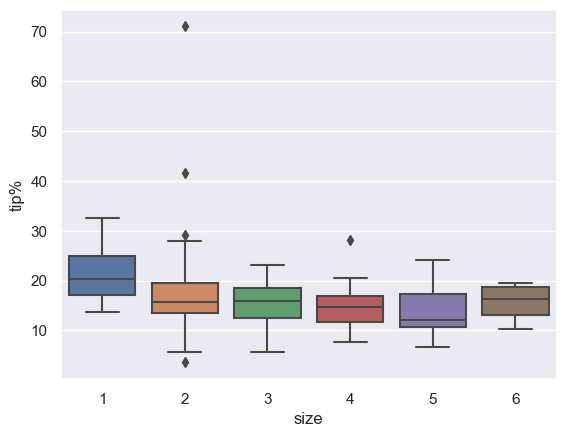

In [56]:
fig2 = sns.boxplot(tips, x='size', y='tip%')

On peut aussi désactiver l'affichage des outliers avec `showfliers=False`. Affichez le même graphique que précédemment en ajoutant cette option :

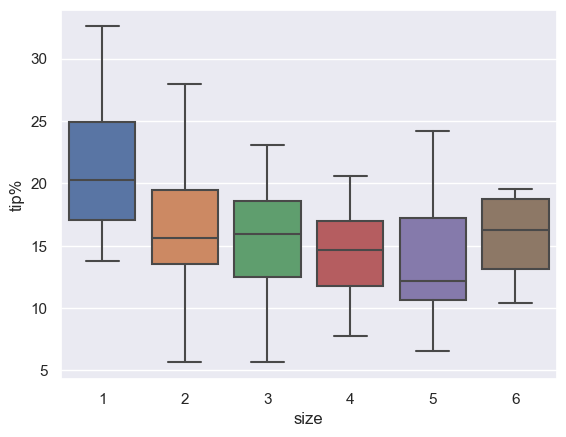

In [57]:
fig2 = sns.boxplot(tips, x='size', y='tip%', showfliers=False)

### Deux variables catégorielles (qualitative - qualitative)

#### Tableau de contingence

Le tableau de contingence entre deux variables catégorielles se calcule avec la fonction [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) de pandas. Calculez le tableau de contingence des variables `sex` et `smoker`.

In [61]:
day_freq = pd.crosstab(tips, columns=tips.sex, normalize=True)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

Le paramètre `margins` permet de calculer les sous-totaux par ligne et colonne :

On peut aussi normaliser le résultat avec `normalize`. Etudiez la documentation et essayez plusieurs valeurs pour ce paramètres.

#### Diagramme en barres

Calculez et stockez dans une variable le tableau de contingence des variables `sex` et `smoker`. Quel est le type du tableau de contingence ?
Affichez un diagramme en barres avec les valeurs contenues dans ce tableau: en abscisse le sexe, en ordonnée le nombre d'observation dans chaque groupe, en distiguant smoker/non-smoker avec des couleurs.

Changez l'ordre des variables dans le tableau de contingence et affichez à nouveau le diagramme en barres correspondant. Quelle est la différence ?

## Modélisation

### Estimation des paramètres d'une loi

On cherche la loi qui modélise le mieux la variable `total_bill`. Affichez l'histogramme.

A partir de l'histogramme, que pouvez vous dire sur la distribution du montant total de l'addition ? Trouvez au moins deux lois de probabilité que vous pensez être adaptées à ces données ? 

Faites un QQ-plot à l'aide de la fonction [qqplot](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html) de la librairie `statsmodels.graphics.gofplots`. Commentez.

Ajustez votre loi favorite par maximum de vraisemblance.

Superposez l'histogramme de la variable ainsi que la densité votre loi vaforite.

La loi vous semble-t-elle appropriée ?

En déduire la probabilité d'avoir une addition supérieure à 70 dollars ?

On va maintenant s'intéresser aux pourboires laissés par le client. Prenez le logarithme des pourboires et trouvez un modèle statistique adéquat ? 

Tentez d'ajuster par maximum de vraisemblance une loi normale sur les log-pourboire dont l'espérance serait de la forme suivante 

$$\mu = \beta_0 + \beta_1 \text{total_bill} + \beta_2 1_{\{\text{size} > 1\}} + \beta_3 \text{sex} + \beta_4 1_{\{\text{day} = \text{Saturday}\}}$$

>**Attention : On prendra soin de retirer l'outlier, i.e., dont le ratio tip / total_bill est trop grand, de notre échantillon car cette valeur est trop influente (ce qui n'est pas bien)**

A partir de cet ajustement, calcules les erreurs standards pour chacun des paramètres.

En déduire un intervalle de confiance pour chacun des paramètres.

Lorsque 0 appartient à l'intervalle de confiance, ceci suggère que le paramètre n'est pas statistiquement significatif et que nous pouvons donc le retirer du modèle. Mettez à jour votre modèle et comparez les prédictions aux observations.

Comparez les observations via la prédiction via la mediane selon votre modèle ajusté.

Sous votre modèle, quelle est la probabilité qu'une table de 4 personnes ayant une addition de 80\\$ donne un pourboire supérieur à 20\\$ ?

Tracez l'évolution de cette probabilité en faisant varier l'addition de 0\\$ à 100\\$.

## Exercice

A partir du fichier [diamonds.csv](https://fxjollois.github.io/cours-2016-2017/donnees/diamonds.csv) (voir l'aide [ici](https://ggplot2.tidyverse.org/reference/diamonds.html)), analyser les données suivant le déroulement classique

1. Description de chaque variable
2. Recherche des liens entre le prix (price) et les autres variables
3. Modélisation de la variable `price`